In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator

## Get timestamps for all units in `cu_exec_start`, `cu_exec_stop`

In [2]:
rp_folder = glob.glob('/Users/JumanaDakka/git/hyperspace-radical-collab/hyperspace/microscope/experiments/null/re.*')

src = rp_folder[0]
session = ra.Session(stype='radical.pilot', src=src)
src = '/Users/JumanaDakka/git/htbac-escience-18/null_continuous_fifo/stress-ng-10-mins/stress_ng_10_mins'
units = session.filter(etype = 'unit', inplace = True)

# uid = units_ids,
rp_cu_exec_start = []
rp_cu_exec_stop = []
rp_agent_executing = []
rp_done = []


# events
rp_cu_exec_start = units.timestamps(event = [{ru.EVENT: 'cu_exec_start'}])
rp_cu_exec_stop = units.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}])
rp_cu_exec_start = pd.DataFrame(rp_cu_exec_start, columns = ['cu exec start'])
rp_cu_exec_stop = pd.DataFrame(rp_cu_exec_stop, columns = ['cu exec stop'])

# states
rp_agent_executing = units.timestamps(event = [{ru.STATE: rp.AGENT_SCHEDULING}])
rp_agent_executing = [rp_agent_executing[i] for i in range(len(rp_agent_executing)) if i%2==0]
rp_agent_executing = pd.DataFrame(rp_agent_executing, columns = ['AGENT SCHEDULING'])
# rp_done = pd.DataFrame(wrangler_units['DONE'].tolist(), columns=['DONE (RP)'])

units_1 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[0:17])
units_2 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[18:27])
u1_exec = units_1.duration(state=['UMGR_SCHEDULING','DONE'])
u2_exec = units_2.duration(state=['UMGR_SCHEDULING','DONE'])

df = pd.concat([rp_agent_executing, rp_cu_exec_start, rp_cu_exec_stop],  axis=1)

## Tasks of MD Pipeline 

In [3]:
pipeline_md = df[0:18]
pipeline_md_agent_sched = pipeline_md['AGENT SCHEDULING']
pipeline_md

,AGENT SCHEDULING,cu exec start,cu exec stop
0,28524.1727,28525.0652,32126.0990
1,28524.1727,28525.8405,32126.1219
2,28524.1727,28525.8681,32126.4280
3,28524.1727,28525.9000,32126.4524
4,28524.1727,28525.9255,32126.4565
5,28524.1727,28525.9332,32126.4616
6,28524.1727,28525.9456,32126.6814
7,28524.1727,28525.9894,32126.6853
8,28524.1727,28525.9905,32126.7131
9,28524.1727,28526.0320,32126.7421


## Tasks of ML Pipeline

In [4]:
pipeline_ml = df[18:28]
pipeline_ml_agent_sched = pipeline_ml['AGENT SCHEDULING']
pipeline_ml

,AGENT SCHEDULING,cu exec start,cu exec stop
18,28524.1727,28526.6499,35725.5998
19,28524.1727,28526.6503,35725.9474
20,28524.1727,28526.7041,35725.9882
21,28524.1727,28526.7176,35726.0178
22,28524.1727,28526.7176,35726.0470
23,28524.1727,28526.8842,35726.0529
24,28524.1727,28526.8843,35726.0621
25,28524.1727,28526.9471,35726.1685
26,28524.1727,28528.6737,35726.2053
27,28524.1727,28528.6737,35726.2324


### Each subplot presents the data for an EnTK stage (1-4). 


/Users/JumanaDakka/environments/ve_entk_integration/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


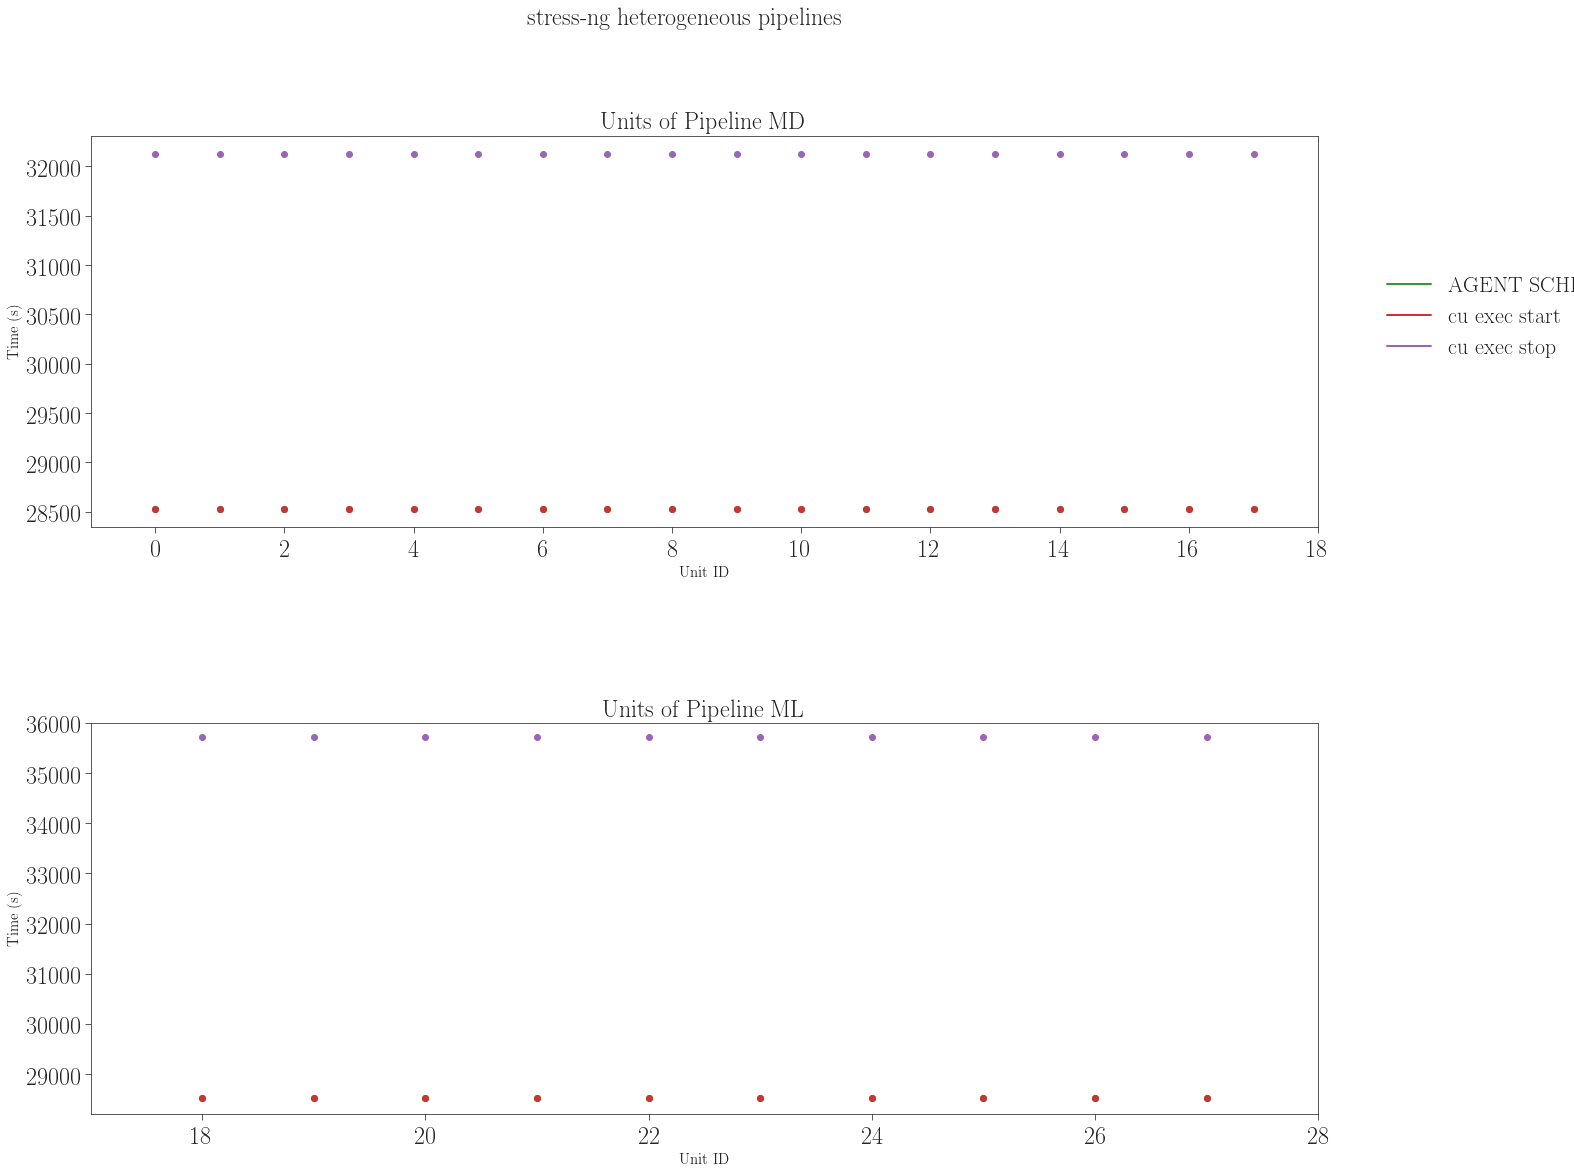

In [5]:
# nunits = concurrent units 
nunits = [1,2,3,4]
fwidth = 32
fhight = 10

fig, axarr = plt.subplots(2, figsize=(22,18))
fig.suptitle('stress-ng heterogeneous pipelines')
axarr[0].scatter(pipeline_md['AGENT SCHEDULING'].index, pipeline_md['AGENT SCHEDULING'],  marker='o', color=tableau20[4])
axarr[0].scatter(pipeline_md['cu exec start'].index, pipeline_md['cu exec start'],  marker='o', color=tableau20[6])
axarr[0].scatter(pipeline_md['cu exec stop'].index, pipeline_md['cu exec stop'],  marker='o', color=tableau20[8])
axarr[0].set_xlim(-1,18)
axarr[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axarr[0].set_ylabel('Time (s)')
axarr[0].set_title('Units of Pipeline MD')
axarr[0].set_ylabel('Time (s)', fontsize = 15)
axarr[0].set_xlabel('Unit ID', fontsize = 15)

axarr[1].scatter(pipeline_ml['AGENT SCHEDULING'].index, pipeline_ml['AGENT SCHEDULING'],  marker='o', color=tableau20[4])
axarr[1].scatter(pipeline_ml['cu exec start'].index, pipeline_ml['cu exec start'],  marker='o', color=tableau20[6])
axarr[1].scatter(pipeline_ml['cu exec stop'].index, pipeline_ml['cu exec stop'],  marker='o', color=tableau20[8])
axarr[1].set_title('Units of Pipeline ML')
axarr[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axarr[1].set_ylabel('Time (s)')
axarr[1].set_xlim(17,28)
axarr[1].set_ylabel('Time (s)', fontsize = 15)
axarr[1].set_xlabel('Unit ID', fontsize = 15)
axarr[1].set_ylim(28200,36000)
# axarr[1].set_yticklabels([29250,29250,29250,29750])
# axarr[1].yaxis.set_major_locator(MaxNLocator(integer=True))

fig.subplots_adjust(hspace=0.5)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[4]),
                mpl.lines.Line2D([], [], color=tableau20[6]),
                mpl.lines.Line2D([], [], color=tableau20[8])
           ),
           (
                'AGENT SCHEDULING',
                'cu exec start',
                'cu exec stop',
           ),
            bbox_to_anchor=(.87, .7), loc=2, borderaxespad=0.)


# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('stress-ng-scatter.pdf', dpi=300, bbox_inches='tight')
plt.savefig('stress-ng-scatter.png', dpi=300, bbox_inches='tight')


In [7]:


# segregate into pipelines 


pipeline_md_as = pipeline_md['AGENT SCHEDULING'].mean()
pipeline_md_cu_start = pipeline_md['cu exec start'].mean()
pipeline_md_cu_stop = pipeline_md['cu exec stop'].mean()

pipeline_ml_as = pipeline_ml['AGENT SCHEDULING'].mean()
pipeline_ml_cu_start = pipeline_ml['cu exec start'].mean()
pipeline_ml_cu_stop = pipeline_ml['cu exec stop'].mean()

data = {'Pipeline MD': [pipeline_md_as, pipeline_md_cu_start, pipeline_md_cu_stop], 
        'Pipeline ML': [pipeline_ml_as, pipeline_ml_cu_start, pipeline_ml_cu_stop]}
pipelines = pd.DataFrame(data, dtype=np.float64).T 
pipelines.columns = ['AGENT SCHEDULING', 'cu exec start', 'cu exec stop'] 

%store pipelines


Stored 'pipelines' (DataFrame)


In [8]:
pipelines

,AGENT SCHEDULING,cu exec start,cu exec stop
Pipeline MD,28524.1727,28526.06100,32126.891506
Pipeline ML,28524.1727,28527.15025,35726.032140


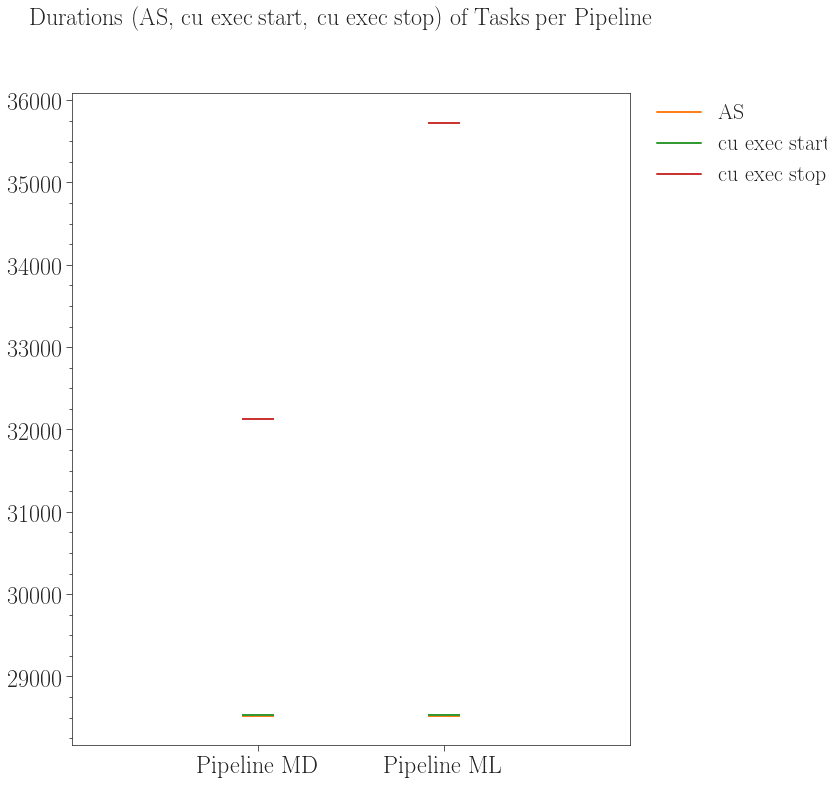

In [9]:
fig, axarr = plt.subplots(figsize=(10,12))
fig.suptitle('Durations (AS, cu exec start, cu exec stop) of Tasks per Pipeline')
y_pos = [1,2]
bars = ['Pipeline MD', 'Pipeline ML']

marker_style = dict(marker = '_', s = 1000)

axarr.scatter(y_pos, pipelines['AGENT SCHEDULING'], color=tableau20[2], **marker_style)
axarr.scatter(y_pos, pipelines['cu exec start'], color=tableau20[4], **marker_style)
axarr.scatter(y_pos, pipelines['cu exec stop'], color=tableau20[6], **marker_style)



# axarr.set_yticklabels([29750,30000,30000,30500])
axarr.set_xticks([1,2])
axarr.set_xticklabels(["Pipeline MD","Pipeline ML"])
axarr.set_xlim([0,3])
# axarr.set_yticks(np.arange(28500, 31200, step = 150))
axarr.yaxis.set_minor_locator(AutoMinorLocator(4))

fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[2]),
                mpl.lines.Line2D([], [], color=tableau20[4]),
                mpl.lines.Line2D([], [], color=tableau20[6])
                 
           ),
           (
                'AS',
                'cu exec start',
                'cu exec stop'
                
           ),
             bbox_to_anchor=(.9, .8), loc=2, borderaxespad=0.)


# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('stress-ng-scatter-events.pdf', dpi=300, bbox_inches='tight')
plt.savefig('stress-ng-scatter-events.png', dpi=300, bbox_inches='tight')

# axarr.set_yticks()


# axarr[0].set_xlim(-1,20)
# axarr[0].xaxis.set_major_locator(MaxNLocator(integer=True))
# axarr[0].set_ylabel('Time (s)')
# axarr[0].set_title('Units of Stage 1')

### Durations/Stage (Seperate Pipelines)

In [ ]:
# # stage 1 
# units_p1_s1 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[0:10])
# p1_s1_duration = units_p1_s1.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 1"]['S1 (AS)']


# units_p2_s1 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[10:20])
# p2_s1_duration = units_p2_s1.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 2"]['S1 (AS)']

# # stage 2
# units_p1_s2 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[20:30])
# p1_s2_duration = units_p1_s2.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 1"]['S2 (AS)']

# units_p2_s2 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[30:40])
# p2_s2_duration = units_p2_s2.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 2"]['S2 (AS)']

# # stage 3
# units_p1_s3 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[40:50])
# p1_s3_duration = units_p1_s3.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 1"]['S3 (AS)']

# units_p2_s3 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[50:60])
# p2_s3_duration = units_p2_s3.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 2"]['S3 (AS)']

# # stage 4

# units_p1_s4 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[60:70])
# p1_s4_duration = units_p1_s4.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 1"]['S4 (AS)']

# units_p2_s4 = session.filter(etype='unit', inplace=False, uid=sorted(session.list('uid'))[70:80])
# p2_s4_duration = units_p2_s4.duration(state=['AGENT_SCHEDULING','DONE']) + pipelines.loc["Pipeline 2"]['S4 (AS)']

# %store p1_s1_duration
# %store p2_s1_duration

# %store p1_s2_duration
# %store p2_s2_duration

# %store p1_s3_duration
# %store p2_s3_duration

# %store p1_s4_duration
# %store p2_s4_duration


In [ ]:
# fig, axarr = plt.subplots(figsize=(10,12))
# fig.suptitle('Average (AS and DONE) timestamps of Stages per Pipeline')
# y_pos = [1,2]
# bars = ['Pipeline 1', 'Pipeline 2']

# marker_style = dict(linewidth=20)

# # pipeline 1, all stages

# axarr.plot([y_pos[0], y_pos[0]], [pipelines.loc["Pipeline MD"]['S1 (AS)'], p1_s1_duration], **marker_style)
# axarr.plot([y_pos[0], y_pos[0]], [pipelines.loc["Pipeline MD"]['S2 (AS)'], p1_s2_duration], **marker_style)
# # axarr.plot([y_pos[0], y_pos[0]], [pipelines.loc["Pipeline 1"]['S3 (AS)'], p1_s3_duration], **marker_style)
# # axarr.plot([y_pos[0], y_pos[0]], [pipelines.loc["Pipeline 1"]['S4 (AS)'], p1_s4_duration], **marker_style)


# # pipeline 2, all stages

# axarr.plot([y_pos[1], y_pos[1]], [pipelines.loc["Pipeline ML"]['S1 (AS)'], p2_s1_duration], **marker_style)
# axarr.plot([y_pos[1], y_pos[1]], [pipelines.loc["Pipeline ML"]['S2 (AS)'], p2_s2_duration], **marker_style)
# # axarr.plot([y_pos[1], y_pos[1]], [pipelines.loc["Pipeline 2"]['S3 (AS)'], p2_s3_duration], **marker_style)
# # axarr.plot([y_pos[1], y_pos[1]], [pipelines.loc["Pipeline 2"]['S4 (AS)'], p2_s4_duration], **marker_style)

# axarr.set_yticks(np.arange(28500, 31200, step = 150))
# axarr.yaxis.set_minor_locator(AutoMinorLocator(4))

# # axarr.set_ylim(28620, 31260)
# axarr.set_xticks([1,2])
# axarr.set_xticklabels(["Pipeline 1","Pipeline 2"])
# axarr.set_xlim([0,3])